In [3]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to msajjad@leomail.tamuc.edu and will expire on December 31, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1516471740.log


# Create random value for x in iinterval [0,1]

In [4]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()


# compute y

In [5]:
y = x.apply(lambda x: math.sin(4*x))

# add random gaussian noise to y

In [6]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y+e

# put data into an SFrame to manipulate later

In [7]:
data = graphlab.SFrame({'X1':x, 'Y': y})

In [8]:
len(data)

30

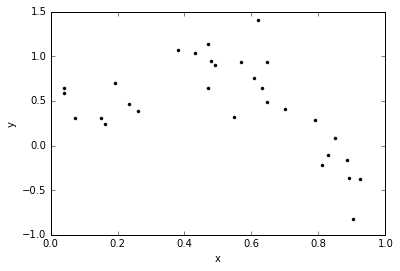

In [96]:
def plt_data(data):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')
plt_data(data)

# Define some polynomial regression function

In [71]:
def pol_feature(data,degree):
    data_copy = data.copy()
    for i in range (1,degree):
        data_copy['X'+str(i+1)] = data_copy['X'+str(i)]* data_copy['X1']
    return data_copy


In [11]:
def pol_regression(data,degree):
    model = graphlab.linear_regression.create(pol_feature(data,degree),
                                             target = 'Y',
                                             l2_penalty = 0.,
                                             l1_penalty = 0.,
                                             validation_set = None,
                                             verbose = False)
    return model

# Define function to plot data and prediction

In [12]:
def plt_pol_prediction(data,model):
    plt_data(data)
    
    #get degree of polynomial
    deg = len(model.coefficients['value'])-1
    
    #create 200 points in x axis and compute y for each x
    x_prad = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(pol_feature(x_prad,deg))
    
    # plt prediction
    plt.plot(x_prad['X1'],y_pred,'g-', label = 'degree'+str(deg)+ ' fit')
    plt.legend(loc= 'upper left')
    plt.axis([0,1,-1.5,2])

In [13]:
model = pol_regression(data,3)

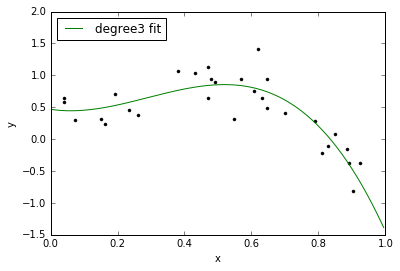

In [14]:
plt_pol_prediction(data,model)

# Create a function that returns model coefficients

In [19]:
def print_coefficients(model):
    #Get degree of pol
    deg = len(model.coefficients['value'])-1
    
    #Get learned parameter as list
    w = list(model.coefficients['value'])
    print 'learned polynomial for degree '+ str(deg)+ ' :'
    w.reverse()
    print numpy.poly1d(w)

In [20]:
print_coefficients(model)

learned polynomial for degree 3 :
        3         2
-8.504 x + 7.392 x - 0.7994 x + 0.468


In [21]:
model2 = pol_regression(data,2)

In [22]:
print_coefficients(model2)

learned polynomial for degree 2 :
        2
-5.129 x + 4.147 x + 0.07471


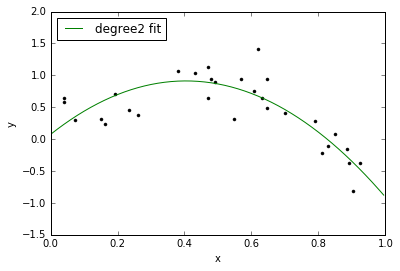

In [23]:
plt_pol_prediction(data,model2)

learned polynomial for degree 4 :
       4         3         2
23.87 x - 53.82 x + 35.23 x - 6.828 x + 0.7755


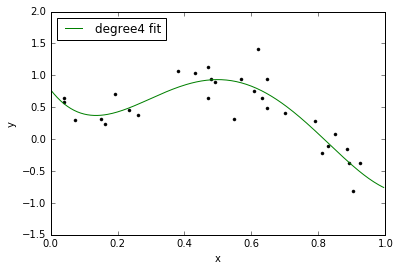

In [27]:
model4 = pol_regression(data,4)
print_coefficients(model4)
plt_pol_prediction(data,model4)

learned polynomial for degree 16 :
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


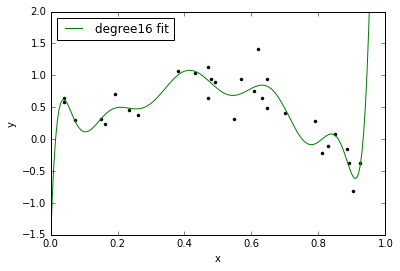

In [28]:
model16 = pol_regression(data,16)
print_coefficients(model16)
plt_pol_prediction(data,model16)

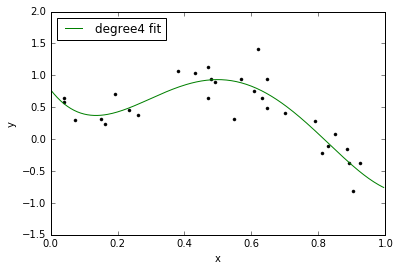

# Ridge Regression

In [32]:
def pol_ridge_regression(data,degree,l2_penalty):
    model = graphlab.linear_regression.create(pol_feature(data,degree),
                                             target = 'Y',
                                             l2_penalty = l2_penalty,
                                             validation_set = None,
                                             verbose = False)
    return model

# perform a ridge fit to a 16 degree pol with small l2 penalty

In [33]:
modelr1 = pol_ridge_regression(data,16,1e-25)

In [34]:
modelr1.get('coefficients')

name,index,value,stderr
(intercept),None,-1.62059918961,9.709249329
X1,None,160.821450426,574.823363179
X2,None,-4182.7227268,13030.6836865
X3,None,50596.8531347,152358.251398
X4,None,-335626.585097,1043045.94438
X5,None,1316901.89798,4424175.30504
X6,None,-3130332.13138,11632058.6936
X7,None,4441646.18139,16965790.5351
X8,None,-3662304.97329,nan
X9,None,2178055.27575,nan


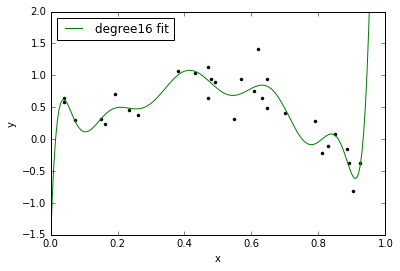

In [35]:
plt_pol_prediction(data,modelr1)

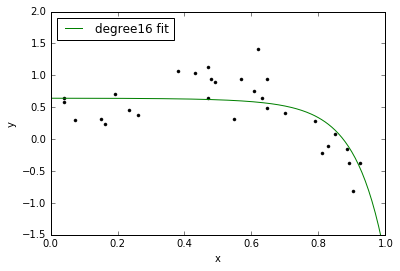

In [36]:
modelr2 = pol_ridge_regression(data,16,100)
modelr2.get('coefficients')
plt_pol_prediction(data,modelr2)

lambda = 1.00e-25
learned polynomial for degree 16 :
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
learned polynomial for degree 16 :
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-06
learned pol

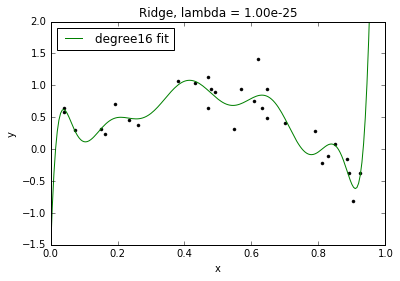

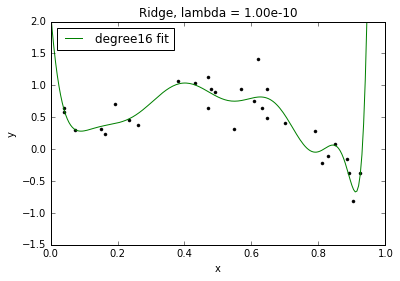

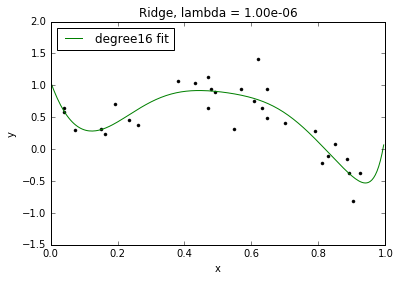

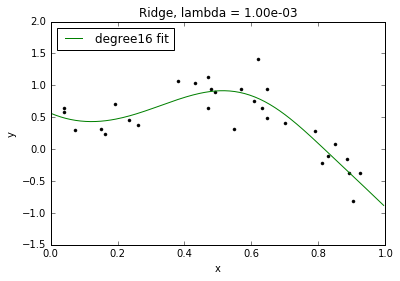

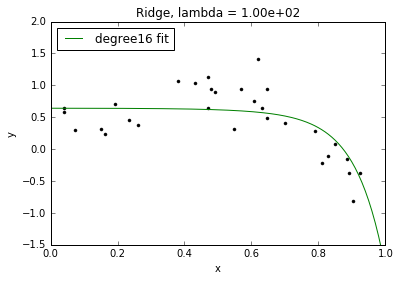

In [38]:
for l2_penalty in [1e-25,1e-10,1e-6,1e-3,1e2]:
    model = pol_ridge_regression(data,16,l2_penalty)
    print 'lambda = %.2e' %l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plt_pol_prediction(data,model)
    plt.title('Ridge, lambda = %.2e' %l2_penalty)

# Create leave one out cross validation

In [118]:
def loo(data,degree,l2_penalty):
    pol_feature(data,degree)
    
    # get the number of data to cross validation
    num_fold = len(data)
    folds = graphlab.cross_validation.KFold(data,num_fold)
    l2_penalty_MSE = []
    mean_MSE = None
    best_l2_penalty = None
    # for each value of l2_penalty, fit a model for each fold and compute MSE
    for l2 in l2_penalty:
        next_MSE = 0.0
        for train_set, validation_set in folds:
            #train model
            model = graphlab.linear_regression.create(train_set,
                                                     target = 'Y',
                                                     l2_penalty = l2,
                                                     validation_set = None,
                                                     verbose = False)
            y_test_predict = model.predict(validation_set)
            #compute squared error
            next_MSE += ((y_test_predict - validation_set['Y'])**2).sum()
        # save squared error in a list of l2_penalty
        next_MSE = next_MSE/num_fold
        l2_penalty_MSE.append(next_MSE)
        if mean_MSE is None or next_MSE<mean_MSE:
            mean_MSE = next_MSE
            best_l2_penalty = l2
    return l2_penalty_MSE, best_l2_penalty
        
    
    

Run loo validation for num values of lambda on log scale

In [50]:
l2_penalty_values = numpy.logspace(-4,10,num = 10)
l2_penalty_values

array([  1.00000000e-04,   3.59381366e-03,   1.29154967e-01,
         4.64158883e+00,   1.66810054e+02,   5.99484250e+03,
         2.15443469e+05,   7.74263683e+06,   2.78255940e+08,
         1.00000000e+10])

In [117]:
l2_penalty_MSE, best_l2_penalty = loo(data,16,l2_penalty_values)
l2_penalty_MSE

TypeError: __init__() got an unexpected keyword argument 'k'

Plot results of estimating loo for each lambda

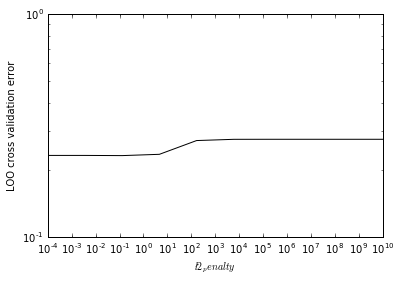

In [53]:
plt.plot(l2_penalty_values,l2_penalty_MSE,'k-')
plt.xlabel('$\l2_penalty$')
plt.ylabel('LOO cross validation error')
plt.xscale('log')
plt.yscale('log')

In [54]:
best_l2_penalty

0.12915496650148839

In [55]:
model_best1 = pol_ridge_regression(data,16,best_l2_penalty)

learned polynomial for degree 16 :
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918


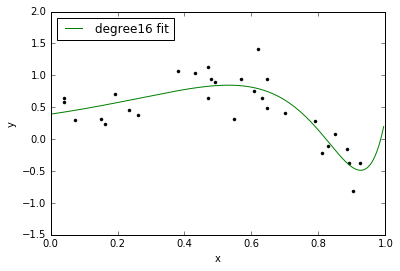

In [57]:
print_coefficients(model_best1)
plt_pol_prediction(data,model_best1)

# Programming assignment 01

In [61]:
sales = graphlab.SFrame('/Users/Sajjad/Downloads/kc_house_data.gl')
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [66]:
sales = sales.sort('sqft_living',ascending=True)

In [67]:
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875,1,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801,1,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000,1,0
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444,1,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900,1,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000,1,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636,1,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298,1,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720,1,0
8658300340,2014-05-23 00:00:00+00:00,80000.0,1.0,0.75,430.0,5050,1,0


Generate 15th order polynomial of sqft_living

In [76]:
def poly_feature(data,feature,degree):
    data_copy = data.copy()
    data_copy[feature+str(1)]=data_copy[feature]
    for i in range (1,degree):
        data_copy[feature+str(i+1)] = data_copy[feature+str(i)]* data_copy[feature]
    return data_copy



In [104]:
sales_1 = sales['sqft_living','price']


In [105]:
pol_sframe = poly_feature(sales_1,'sqft_living',15)

In [106]:
def poly_ridge_regression(data,feature,degree,l2_penalty):
    model = graphlab.linear_regression.create(poly_feature(data,feature,degree),
                                             target = 'price',
                                             l2_penalty = l2_penalty,
                                             validation_set = None,
                                             verbose = False)
    return model


In [107]:
my_first_model = poly_ridge_regression(pol_sframe,'sqft_living',15,1.5e-5)
my_first_model.get('coefficients')

name,index,value,stderr
(intercept),None,156895.08634,nan
sqft_living,None,68.7087884155,nan
sqft_living1,None,68.7088858421,nan
sqft_living2,None,0.0943399579878,nan
sqft_living3,None,-0.000106003524484,nan
sqft_living4,None,4.50486947993e-08,nan
sqft_living5,None,-6.81265028255e-12,nan
sqft_living6,None,1.46333276159e-16,nan
sqft_living7,None,3.8054354638e-20,nan
sqft_living8,None,-2.15404792578e-25,nan


In [111]:
def plt_data(data,x,y,model):
    plt.plot(data[x],data[y],'k.',
            data[x],model.predict(data),'-')
    plt.xlabel('x')
    plt.ylabel('y')



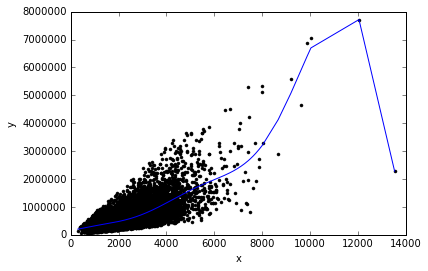

In [112]:
plt_data(pol_sframe,'sqft_living','price',my_first_model)

In [115]:
from sklearn import linear_model
import numpy as np

l2_small_penalty = 1.5e-5
model = graphlab.linear_regression.create(pol_sframe,
                                          target = 'price',
                                          l2_penalty=l2_small_penalty,
                                          validation_set =None)
model.fit(pol_sframe, sales['price'])

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 16

Number of unpacked features : 16

Number of coefficients    : 17

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.023676     | 2664005.586082     | 245658.000606 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

AttributeError: 'LinearRegression' object has no attribute 'fit'

In [119]:
my_l2 = np.logspace(1,7,num =13)

In [120]:
my_l2

array([  1.00000000e+01,   3.16227766e+01,   1.00000000e+02,
         3.16227766e+02,   1.00000000e+03,   3.16227766e+03,
         1.00000000e+04,   3.16227766e+04,   1.00000000e+05,
         3.16227766e+05,   1.00000000e+06,   3.16227766e+06,
         1.00000000e+07])

In [130]:
for i in range(0,len(my_l2)):
    x = my_l2[i]
x

10000000.0